In [39]:
from lib.helpers import *
from qiskit.visualization import plot_coupling_map, plot_circuit_layout
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
import numpy as np

In [2]:
service = get_qiskit_runtime_service('provider')

Qiskit Account loaded successfully. 
Channel:	ibm_quantum
Instance:	ibm-q/open/main


In [3]:
backend = service.get_backend('ibm_brisbane')

In [18]:
q_coords = [[0, 0], [0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [0, 7], [0, 8], [0, 9], [0, 10], [0, 11], [0, 12], [0, 13], [1, 0], [1, 4], [1, 8], [1, 12], [2, 0], [2, 1], [2, 2], [2, 3], [2, 4], [2, 5], [2, 6], [2, 7], [2, 8], [2, 9], [2, 10], [2, 11], [2, 12], [2, 13], [2, 14], [3, 2], [3, 6], [3, 10], [3, 14], [4, 0], [4, 1], [4, 2], [4, 3], [4, 4], [4, 5], [4, 6], [4, 7], [4, 8], [4, 9], [4, 10], [4, 11], [4, 12], [4, 13], [4, 14], [5, 0], [5, 4], [5, 8], [5, 12], [6, 0], [6, 1], [6, 2], [6, 3], [6, 4], [6, 5], [6, 6], [6, 7], [6, 8], [
    6, 9], [6, 10], [6, 11], [6, 12], [6, 13], [6, 14], [7, 2], [7, 6], [7, 10], [7, 14], [8, 0], [8, 1], [8, 2], [8, 3], [8, 4], [8, 5], [8, 6], [8, 7], [8, 8], [8, 9], [8, 10], [8, 11], [8, 12], [8, 13], [8, 14], [9, 0], [9, 4], [9, 8], [9, 12], [10, 0], [10, 1], [10, 2], [10, 3], [10, 4], [10, 5], [10, 6], [10, 7], [10, 8], [10, 9], [10, 10], [10, 11], [10, 12], [10, 13], [10, 14], [11, 2], [11, 6], [11, 10], [11, 14], [12, 1], [12, 2], [12, 3], [12, 4], [12, 5], [12, 6], [12, 7], [12, 8], [12, 9], [12, 10], [12, 11], [12, 12], [12, 13], [12, 14]]

[(1, 0),
 (2, 1),
 (3, 2),
 (4, 3),
 (4, 5),
 (4, 15),
 (6, 5),
 (6, 7),
 (7, 8),
 (8, 9),
 (10, 9),
 (10, 11),
 (11, 12),
 (12, 17),
 (13, 12),
 (14, 0),
 (14, 18),
 (15, 22),
 (16, 8),
 (16, 26),
 (17, 30),
 (18, 19),
 (20, 19),
 (20, 33),
 (21, 20),
 (21, 22),
 (22, 23),
 (24, 23),
 (24, 34),
 (25, 24),
 (26, 25),
 (27, 26),
 (28, 27),
 (28, 29),
 (28, 35),
 (30, 29),
 (30, 31),
 (31, 32),
 (32, 36),
 (33, 39),
 (34, 43),
 (35, 47),
 (36, 51),
 (37, 38),
 (39, 38),
 (40, 39),
 (40, 41),
 (41, 53),
 (42, 41),
 (42, 43),
 (43, 44),
 (44, 45),
 (46, 45),
 (46, 47),
 (48, 47),
 (48, 49),
 (50, 49),
 (50, 51),
 (52, 37),
 (52, 56),
 (53, 60),
 (54, 45),
 (54, 64),
 (55, 49),
 (55, 68),
 (56, 57),
 (57, 58),
 (58, 59),
 (58, 71),
 (59, 60),
 (60, 61),
 (62, 61),
 (62, 63),
 (62, 72),
 (63, 64),
 (65, 64),
 (65, 66),
 (67, 66),
 (67, 68),
 (69, 68),
 (69, 70),
 (73, 66),
 (74, 70),
 (74, 89),
 (75, 90),
 (76, 75),
 (77, 71),
 (77, 76),
 (77, 78),
 (79, 78),
 (79, 80),
 (80, 81),
 (81, 72),

array([0.41176471, 0.16078431, 0.76862745, 1.        ])

In [115]:
mpl.font_manager.FontManager().get_font_names()

['Geneva',
 'Seravek',
 'Savoye LET',
 'Raanana',
 'DIN Condensed',
 'STIXIntegralsUpSm',
 'Marker Felt',
 '.SF NS Mono',
 'Gujarati Sangam MN',
 'Noto Sans Limbu',
 '.ThonburiUI',
 '.SF Arabic Rounded',
 'Noto Sans Masaram Gondi',
 'Chalkboard',
 'Helvetica Neue',
 'Noto Sans Old South Arabian',
 'PingFang HK',
 'Hiragino Maru Gothic Pro',
 'Noto Sans New Tai Lue',
 'Nadeem',
 'Trattatello',
 'Noto Sans Meroitic',
 'Noto Sans Khojki',
 'JetBrains Mono',
 'Kannada MN',
 'Noto Sans Rejang',
 'Noto Sans Glagolitic',
 'Apple Braille',
 'Iowan Old Style',
 '.New York',
 'Brush Script MT',
 'OCR-A BT',
 'Noto Sans Newa',
 'Bangla Sangam MN',
 'SF Compact',
 'Noto Sans Oriya',
 'Noto Sans Duployan',
 'ITF Devanagari',
 'Noto Sans Linear A',
 'Songti SC',
 'Noto Sans Chakma',
 'Monaco',
 'Malayalam Sangam MN',
 'XITS Math',
 'Myanmar MN',
 'Baghdad',
 'STIXIntegralsD',
 'Hoefler Text',
 'Noto Sans Sora Sompeng',
 'Noto Sans Osmanya',
 'Noto Sans Miao',
 'Papyrus',
 'Bodoni Ornaments',
 'KufiS

In [112]:
mpl.font_manager.FontManager().findfont('IBM Plex Sans')
# mpl.font_manager.findfont()

mpl.font_manager.fontManager.addfont(
    mpl.font_manager.FontManager().findfont('IBM Plex Sans Medium'))

findfont: Font family ['IBM Plex Sans Medium'] not found. Falling back to DejaVu Sans.


In [155]:
nodes = [x for x in backend.coupling_map.shortest_undirected_path(0, 126)]

path = []
for node in range(len(nodes) - 1):
    path.append(set((nodes[node], nodes[node + 1])))

path

[{0, 14},
 {14, 18},
 {18, 19},
 {19, 20},
 {20, 33},
 {33, 39},
 {39, 40},
 {40, 41},
 {41, 53},
 {53, 60},
 {60, 61},
 {61, 62},
 {62, 72},
 {72, 81},
 {81, 82},
 {82, 83},
 {83, 92},
 {92, 102},
 {102, 103},
 {103, 104},
 {104, 111},
 {111, 122},
 {122, 123},
 {123, 124},
 {124, 125},
 {125, 126}]

In [156]:
set(path[0]) == set({14, 0})

True

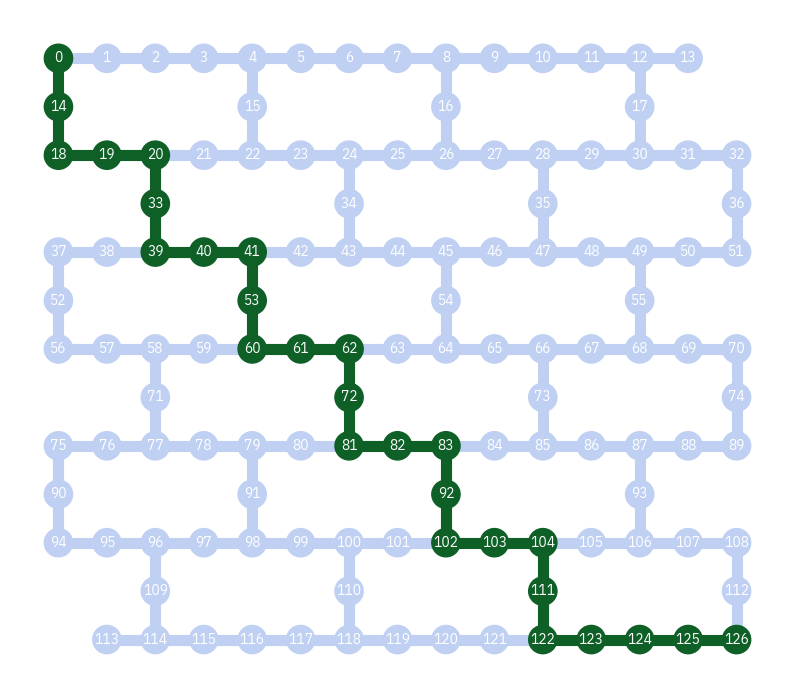

In [162]:
import matplotlib as mpl
mpl.rcParams['font.family'] = 'IBM Plex Sans'
mpl.rcParams["font.weight"] = "bold"
colors = []
edges = []
magenta = np.array([14, 96, 39, 255]) / 255
blue = np.array([191, 208, 243, 255]) / 255


for i in range(127):
    if (i in nodes):
        colors.append(magenta)
    else:
        colors.append(blue)

for edge in backend.coupling_map:

    if (set(edge) in path):
        edges.append(magenta)
    else:
        edges.append(blue)

# ax = plt.gca()

plot_coupling_map(coupling_map=[x for x in backend.coupling_map],  qubit_coordinates=q_coords, num_qubits=127, plot_directed=False, label_qubits=True, figsize=(
    10, 10), qubit_color=colors, line_color=edges, line_width=8, font_size=15, filename='coupling_map_127-visited-qubits.eps')